In [1]:
import numpy as np

def wind_speed_log_profile(z, u_star, d, z_m):
    """
    Calculate wind speed using the logarithmic wind profile.

    Parameters:
    - z: Height above the surface (m)
    - u_star: Friction velocity (m/s)
    - d: Zero-plane displacement (m)
    - z_m: Roughness length (m)

    Returns:
    - Wind speed at height z (m/s)
    """
    von_karman = 0.4  # Von Karman constant
    return (u_star / von_karman) * np.log((z - d) / z_m)

# Example usage
z = 3  # Height (m)
u_star = 0.16  # Friction velocity (m/s)
d = 0.02  # Zero-plane displacement (m)
z_m = 0.003  # Roughness length (m)
u = wind_speed_log_profile(z, u_star, d, z_m)
print(f"Wind speed at {z} m: {u:.2f} m/s")


Wind speed at 3 m: 2.76 m/s


In [2]:
def wind_speed_canopy(z, u_h, h, a):
    """
    Calculate wind speed within a canopy using exponential decay.

    Parameters:
    - z: Height above the ground (m)
    - u_h: Wind speed at the top of the canopy (m/s)
    - h: Canopy height (m)
    - a: Attenuation coefficient

    Returns:
    - Wind speed within the canopy (m/s)
    """
    return u_h * np.exp(a * (z / h - 1))

# Example usage
z = 1  # Height within the canopy (m)
u_h = 2.43  # Wind speed at canopy top (m/s)
h = 2  # Canopy height (m)
a = 2  # Attenuation coefficient (for corn)
u_canopy = wind_speed_canopy(z, u_h, h, a)
print(f"Wind speed at {z} m within canopy: {u_canopy:.2f} m/s")


Wind speed at 1 m within canopy: 0.89 m/s


In [3]:
def calculate_friction_velocity(u_z, z, d, z_m):
    """
    Calculate friction velocity from wind speed and profile parameters.

    Parameters:
    - u_z: Wind speed at height z (m/s)
    - z: Height above the surface (m)
    - d: Zero-plane displacement (m)
    - z_m: Roughness length (m)

    Returns:
    - Friction velocity (m/s)
    """
    von_karman = 0.4  # Von Karman constant
    return u_z * von_karman / np.log((z - d) / z_m)

# Example usage
u_z = 5  # Wind speed at height z (m/s)
z = 2  # Height (m)
d = 0.02  # Zero-plane displacement (m)
z_m = 0.003  # Roughness length (m)
u_star_calculated = calculate_friction_velocity(u_z, z, d, z_m)
print(f"Friction velocity: {u_star_calculated:.2f} m/s")


Friction velocity: 0.31 m/s


In [5]:
def calculate_attenuation_coefficient(h, leaf_width=None, leaf_area_index=None):
    """
    Calculate attenuation coefficient for a canopy.

    Parameters:
    - h: Canopy height (m)
    - leaf_width: Leaf width (m) [optional]
    - leaf_area_index: Leaf area index (dimensionless) [optional]

    Returns:
    - Attenuation coefficient (dimensionless)
    """
    if leaf_width:
        return h / (h**2 / leaf_width)  # Broad leaves
    elif leaf_area_index:
        return h / leaf_area_index  # Grass leaves
    else:
        raise ValueError("Provide either leaf_width or leaf_area_index.")

# Example usage
h = 2  # Canopy height (m)
leaf_width = 0.1  # Broad leaf width (m)
a_broad = calculate_attenuation_coefficient(h, leaf_width=leaf_width)
print(f"Attenuation coefficient (broad leaves): {a_broad:.2f}")


Attenuation coefficient (broad leaves): 0.05


C:\Users\paulinkenbrandt\AppData\Local\Temp\1\ipykernel_10336\1392499796.py:18: RuntimeWarning: invalid value encountered in log
  return (u_star / von_karman) * np.log((z - d) / z_m)


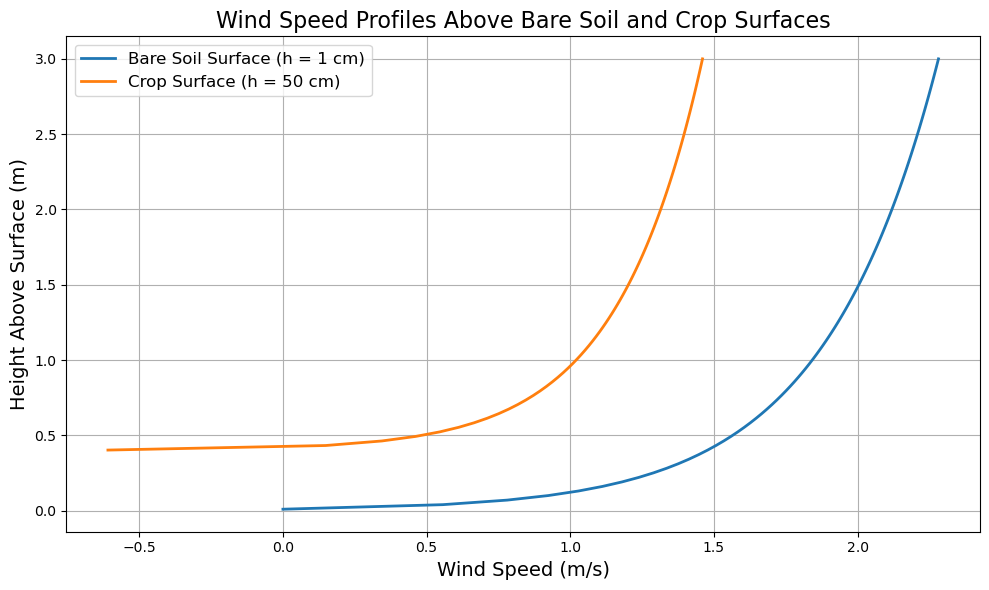

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def wind_speed_log_profile(z, u_star, d, z_m):
    """
    Calculate wind speed using the logarithmic wind profile.

    Parameters:
    - z: Height above the surface (m)
    - u_star: Friction velocity (m/s)
    - d: Zero-plane displacement (m)
    - z_m: Roughness length (m)

    Returns:
    - Wind speed at height z (m/s)
    """
    von_karman = 0.4  # Von Karman constant
    return (u_star / von_karman) * np.log((z - d) / z_m)

# Parameters for two scenarios: bare soil and crop
# Bare soil
z_soil = np.linspace(0.01, 3, 100)  # Height above surface (m)
u_star_soil = 0.16  # Friction velocity (m/s)
d_soil = 0.0  # Zero-plane displacement (m)
z_m_soil = 0.01  # Roughness length (m)

# Crop (50 cm high)
z_crop = np.linspace(0.01, 3, 100)  # Height above surface (m)
u_star_crop = 0.12  # Friction velocity (m/s)
d_crop = 0.4  # Zero-plane displacement (m)
z_m_crop = 0.02  # Roughness length (m)

# Wind speed profiles
u_soil = wind_speed_log_profile(z_soil, u_star_soil, d_soil, z_m_soil)
u_crop = wind_speed_log_profile(z_crop, u_star_crop, d_crop, z_m_crop)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(u_soil, z_soil, label="Bare Soil Surface (h = 1 cm)", linewidth=2)
plt.plot(u_crop, z_crop, label="Crop Surface (h = 50 cm)", linewidth=2)
plt.xlabel("Wind Speed (m/s)", fontsize=14)
plt.ylabel("Height Above Surface (m)", fontsize=14)
plt.title("Wind Speed Profiles Above Bare Soil and Crop Surfaces", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


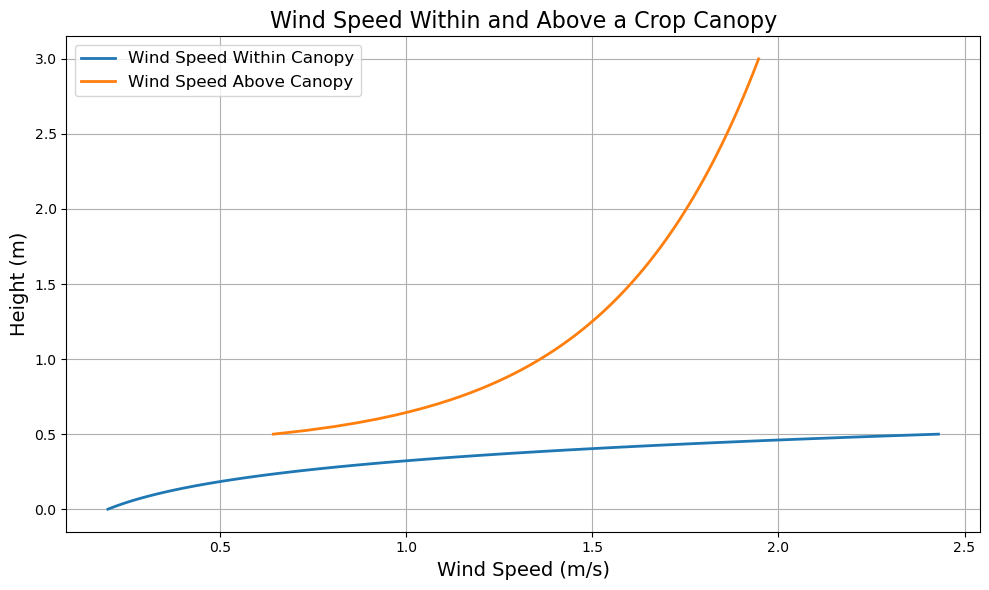

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def wind_speed_canopy(z, u_h, h, a):
    """
    Calculate wind speed within a canopy using exponential decay.

    Parameters:
    - z: Height above the ground (m)
    - u_h: Wind speed at the top of the canopy (m/s)
    - h: Canopy height (m)
    - a: Attenuation coefficient

    Returns:
    - Wind speed within the canopy (m/s)
    """
    return u_h * np.exp(a * (z / h - 1))

def wind_speed_log_profile(z, u_star, d, z_m):
    """
    Calculate wind speed using the logarithmic wind profile.

    Parameters:
    - z: Height above the surface (m)
    - u_star: Friction velocity (m/s)
    - d: Zero-plane displacement (m)
    - z_m: Roughness length (m)

    Returns:
    - Wind speed at height z (m/s)
    """
    von_karman = 0.4  # Von Karman constant
    return (u_star / von_karman) * np.log((z - d) / z_m)

# Parameters for crop canopy wind speed profile (50 cm high crop)
z_canopy = np.linspace(0, 0.5, 100)  # Height within the canopy (m)
h_canopy = 0.5  # Canopy height (m)
a_canopy = 2.5  # Attenuation coefficient
u_h_canopy = 2.43  # Wind speed at the top of the canopy (m/s)

# Wind speed within canopy (exponential decay)
u_canopy = wind_speed_canopy(z_canopy, u_h_canopy, h_canopy, a_canopy)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(u_canopy, z_canopy, label="Wind Speed Within Canopy", linewidth=2)

# Adding logarithmic wind profile above the canopy
z_above_canopy = np.linspace(0.5, 3, 100)  # Height above the canopy (m)
u_star = 0.16  # Friction velocity (m/s)
d = 0.4  # Zero-plane displacement (m)
z_m = 0.02  # Roughness length (m)
u_above_canopy = wind_speed_log_profile(z_above_canopy, u_star, d, z_m)

# Extend the profile above the canopy
plt.plot(u_above_canopy, z_above_canopy, label="Wind Speed Above Canopy", linewidth=2)

# Labels and legend
plt.xlabel("Wind Speed (m/s)", fontsize=14)
plt.ylabel("Height (m)", fontsize=14)
plt.title("Wind Speed Within and Above a Crop Canopy", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Given data for Question 5.1
u_at_2m = 5  # Wind speed at 2 m height (m/s)
h_wheat = 0.6  # Wheat height (m)

# Parameters
d_wheat = 0.65 * h_wheat  # Zero-plane displacement (m)
z_m_wheat = 0.1 * h_wheat  # Roughness length (m)

# Friction velocity calculation
u_star_wheat = calculate_friction_velocity(u_at_2m, 2, d_wheat, z_m_wheat)

# Wind speed at the top of the canopy
u_h_wheat = wind_speed_log_profile(h_wheat + d_wheat, u_star_wheat, d_wheat, z_m_wheat)

u_h_wheat
